Let's implement a logistic regression for the lobster problem!  Let's begin with a few imports.

In [1]:
from __future__ import division    # Eliminates annoying default integer division behavior
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Logistic regression is relatively simple to implement.  To begin with, we need the logistic function $\sigma(\mathbf{w}^T \mathbf{x})$:

In [2]:
# The sigmoid function
def _sigmoid(w,X):
    z = np.dot(X,w)
    return 1./(1+np.exp(-z))

Next we'll need an objective function, given by the log-likelihood of the Bernoulli distribution:
\begin{equation}
\mathcal{J}(X,\mathbf{y},\mathbf{w}) = -\sum_{i=1}^m y_i \ln \sigma(\mathbf{w}^T X_i) + (1-y_i) \ln (1-\sigma(\mathbf{w}^T X_i)).
\end{equation}


In [3]:
# The objective function
def _J_fun(w,X):
    return -sum(y*np.log(_sigmoid(w,X)) + (1-y)*np.log(1-_sigmoid(w,X)))

Finally, we'll need the gradient of the objective function with respect to the parameter values:
\begin{equation}
\frac{\partial \mathcal{J}}{\partial \mathbf{w}_j} = \sum_{i=1}^m (\sigma(\mathbf{w}^T X_i) - \mathbf{y}_i) X_{ij}.
\end{equation} 

In [4]:
# The gradient of the objective function
def _gradient_fun(w,X):
    return np.dot(_sigmoid(w,X)-y,X)

With these functions in hand, we just need to import some data:

In [5]:
data = pd.read_csv('lobster_survive.dat',header=0,sep=r"\s{2,}",engine='python')
x = data['Len'].as_matrix().astype(float)
y = data['Survive'].as_matrix().astype(float)
N = len(y)

generate a design matrix $X$ (the Vandermonde matrix):

In [6]:
X = np.vander(x,2,increasing=True)

To implement gradient descent, we need a learning rate $\eta$.  A bit of experimentation has shown that using a tensor-valued $\eta$ works well

In [7]:
eta = np.array([[0.000001,0],[0,0.000000001]])

We need to specify a stopping criterion:  in this case let's just run the thing for $2\times 10^4$ and hope that we've found the optimal value afterwards.

In [8]:
N_iterations = 200000

Since gradient descent is an iterative algorithm, we need to specify some values of $\mathbf{w}$ as an initial guess.

In [9]:
w = np.array([-1.,0.5])  

Finally, to do gradient descent, we just repeatedly evaluate the gradient, scale it with the learning rate, and update the parameters

In [10]:
# Do N_iterations rounds of gradient descent
for i in range(N_iterations):
    grad_w = _gradient_fun(w,X)    # Compute the gradient of the objective function
    w -= np.dot(eta,grad_w)

In [11]:
w

array([-8.63293781,  0.21401289])

We can easily plot our modelled class probabilities over the data

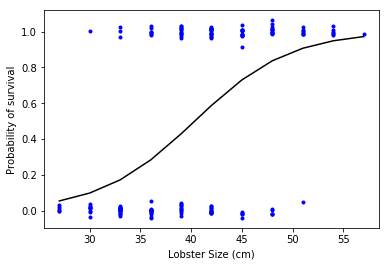

In [18]:
plt.plot(x,y+np.random.randn(len(y))*0.02,'b.')  # Adding Gaussian noise so that we can see the density of points
plt.plot(x,_sigmoid(w,X),'k')
plt.xlabel('Lobster Size (cm)')
plt.ylabel('Probability of survival')
plt.show()

We can also compute the error in our classification by noting that if $\sigma(\mathbf{w}^T\mathbf{x})>0.5$, then we'll predict survival.

In [26]:
classification_error = sum((_sigmoid(w,X)>0.5)==y)/len(y)
print classification_error

0.710691823899371


71%.  Better than guessing, but not great.  This isn't surprising because these data are obviously not seperable!